Analysis

According to the data, ride sharing is most utilized in urban areas (68.4%) and least utilized in rural areas (5.3%).  Suburban areas account for 26.3% of total rides.  A scatter plot was used to examine the relatonship between the number of rides per city and the average fare per city.  It showed that cities with the greatest number of rides have the lowest fares.  These cities also have the largest number of drivers.  Urban areas have the greatest number of rides, and drivers but the lowest fares.  Rural area with the least amount of rides requested and number of drivers have higher fares than urban and surburban areas. More drivers may increase competition among drivers which may lead to lower prices.  It is also possible that drivers travel shorter distances in urban areas which may account for the lower fares and drivers in rural areas may driver farther distances, perhaps taking customers from rural areas to the city, which may account for higher fares.  


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read File and store into Pandas data frame
city_data = pd.read_csv(city_data_to_load)
city_data.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Read File 
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()



,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
#drop duplicate 
city_data = city_data.drop_duplicates('city', keep = 'first')

#merge
merged_data = city_data.merge(ride_data, on = 'city')
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
by_city = merged_data.groupby('city')

avg_fare = by_city.mean()['fare']

ride_count = by_city['ride_id'].count()

driver_count = by_city.mean()['driver_count']

city_type = city_data.set_index('city')['type']


In [5]:
city_data = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})
city_data.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


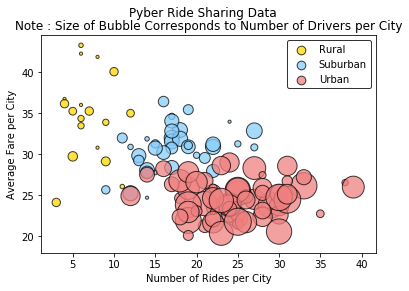

In [6]:

city_data.sort_values('Number of Drivers', ascending = False)

# city categories dataframes
rural = city_data[city_data['Type of City'] == 'Rural']
suburban = city_data[city_data['Type of City'] == 'Suburban']
urban = city_data[city_data['Type of City'] == 'Urban']


plt.suptitle('Pyber Ride Sharing Data')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = ['gold'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = ['lightskyblue'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = ['lightcoral'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()




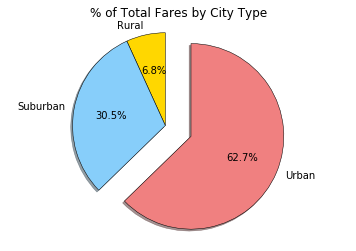

In [7]:
#group by type 
by_type = merged_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart 
labels = fare_sum.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

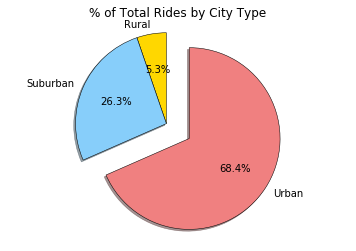

In [8]:
# number of rides per city type
 
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, .3]
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()


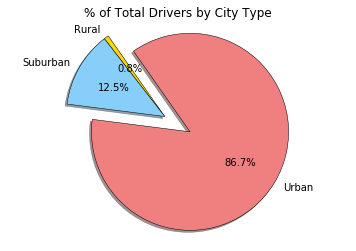

In [9]:
# of driver per city type

colors = ["gold", "lightskyblue", "lightcoral"]
driver_sum = by_type.sum()['driver_count']
labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()